##CNN 실습 (1)

**1. setup**

In [9]:
# import
import tensorflow as tf
from keras import models, layers, datasets, Sequential

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.16.2


**2. dataset**

2.1. Load the fashion MNIST dataset

In [10]:
# load dataset (fashion mnist)
fashion_mnist = datasets.fashion_mnist

(X_tr, y_tr), (X_ts, y_ts) = fashion_mnist.load_data()

2.2. Checking the shape of the datasets

In [11]:
# check dataset

# train
print(X_tr.shape)   # (60000, 28, 28)   : 60000개 이미지, 28*28 크기
print(len(y_tr))    # 60000             : 60000개 레이블
print(y_tr)         # [9 0 0 ... 3 0 5] : 0~9 범위 레이블

# test
print(X_ts.shape)    # (10000, 28, 28)   : 10000개 이미지, 28*28 크기
print(len(y_ts))     # 10000             : 10000개 레이블

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


2.3. data preprocessing

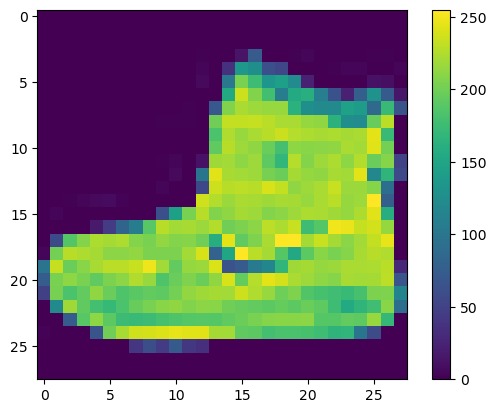

In [12]:
plt.figure()
plt.imshow(X_tr[0])
plt.colorbar()      # 컬러바 추가 (색과 픽셀값 사이의 관계표현)
plt.grid(False)     # 격자 비활성화
plt.show()

In [13]:
# class name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

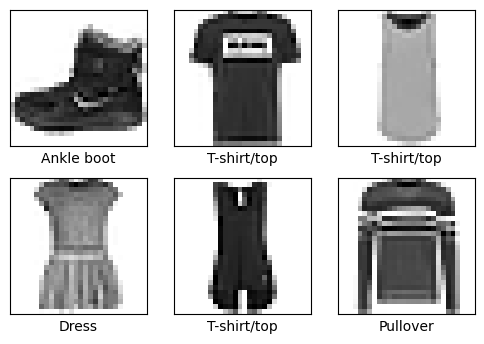

In [14]:
#훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력해보기
#데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비하기


plt.figure(figsize=(6, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)  # 5*5개 서브플롯 중, i+1번째 선택 (idx 1부터 시작, 좌우상하 순서)
    plt.xticks([])          # x 눈금 숨기기
    plt.yticks([])          # y 눈금 숨기기
    plt.grid(False)
    plt.imshow(X_tr[i], cmap=plt.cm.binary) # 이미지 출력
    plt.xlabel(class_names[y_tr[i]])        # 클래스 출력
plt.show()

2.4. Normalize the training images

In [15]:
# normalize (0~255 -> 0~1)
X_tr = X_tr / 255.0
X_ts = X_ts / 255.0

**3. model**

3.1. model setup

In [16]:
# layers
model = Sequential([                          # sequential model 생성
    layers.Flatten(input_shape=(28, 28)),     # 평탄화 (28, 28) -> (784,)
    layers.Dense(128, activation='relu'),     # 밀집층 (노드 128개)
    layers.Dense(10, activation='softmax'),   # 길이가 10인 로짓 배열을 반환. (-> 클래스 점수)
])

/opt/homebrew/Caskroom/miniconda/base/envs/img2023/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# layers 거치는 과정
d1 = X_tr[:1,:,:]
ly1 = layers.Flatten(input_shape=(28, 28))
ly2 = layers.Dense(128, activation='relu')
ly3 = layers.Dense(10, activation='softmax')

d2 = ly1(d1)
d3 = ly2(d2)
d4 = ly3(d3)

print('input: ', d1.shape)      # 입력 (1, 28, 28),       (1 = 배치크기)
print('flatten: ', d2.shape)    # 평탄화 -> (1, 784)
print('dense: ', d3.shape)      # 밀집층 -> (1, 128)
print('softmax: ', d4.shape)    # 소프트맥스 -> (1, 10)     (= 클래스 점수)

input:  (1, 28, 28)
flatten:  (1, 784)
dense:  (1, 128)
softmax:  (1, 10)


/opt/homebrew/Caskroom/miniconda/base/envs/img2023/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3.2. model compile

In [10]:
model.compile(
    optimizer='adam',                                                       # 최적화 함수
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),   # 손실 함수
    metrics=['accuracy']                                                    # 성능평가 지표
)

3.3. model training

In [11]:
# train
model.fit(X_tr, y_tr, epochs=10)

Epoch 1/10


/opt/homebrew/Caskroom/miniconda/base/envs/img2023/lib/python3.9/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-10-01 15:09:15.605913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7844 - loss: 0.6307
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8609 - loss: 0.3834
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8758 - loss: 0.3415
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8843 - loss: 0.3154
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8906 - loss: 0.2929
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8972 - loss: 0.2779
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9007 - loss: 0.2671
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9061 - loss: 0.2566
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9074 - loss: 0.2453
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9103 - loss: 0.2360


3.4. model evaluate

In [12]:
# evaluate
test_loss, test_acc = model.evaluate(X_ts, y_ts, verbose=2)   # verbose 진행상황 출력 수준

print('\ntraining accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.8877 - loss: 0.3301

training accuracy: 0.8877000212669373


**4. make predictional model**

In [13]:
# predictional model
probability_model = Sequential([
    model,
    layers.Softmax()] # class별 확률 도출
)

In [14]:
predictions = probability_model.predict(X_ts)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [15]:
predictions[0] # 0번 test 이미지 예측, 10개 class에 대한 점수(신뢰도, confidence)

array([0.08574188, 0.08574187, 0.08574187, 0.08574187, 0.08574187,
       0.08575329, 0.08574188, 0.08864413, 0.08574187, 0.22540954],
      dtype=float32)

In [16]:
np.argmax(predictions[0]) # y_pred (가장 높은 신뢰도의 class)

9

In [17]:
y_ts[0] # y_true

9

In [18]:
# 10개 클래스에 대한 예측을 모두 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label: # 에측 성공/실패에 따른 label 색깔
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color="#777777") # 회색의 bar plot

  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')  # 예측 레이블 빨강
  thisplot[true_label].set_color('blue')      # 실제 레이블 파랑 (예측성공=파랑, 예측실패=빨/파)

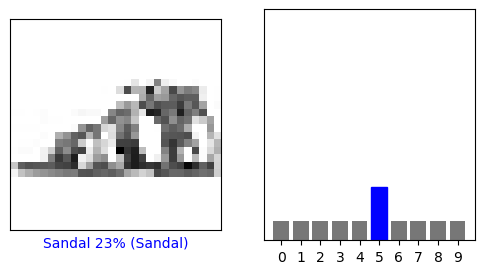

In [19]:
# predict test (one)
i = 11

plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plot_image(i, predictions[i], y_ts, X_ts)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_ts)

plt.show()

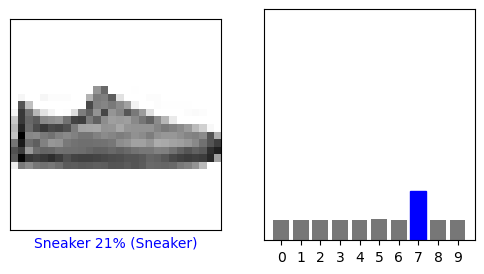

In [20]:
i = 12

plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plot_image(i, predictions[i], y_ts, X_ts)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_ts)

plt.show()

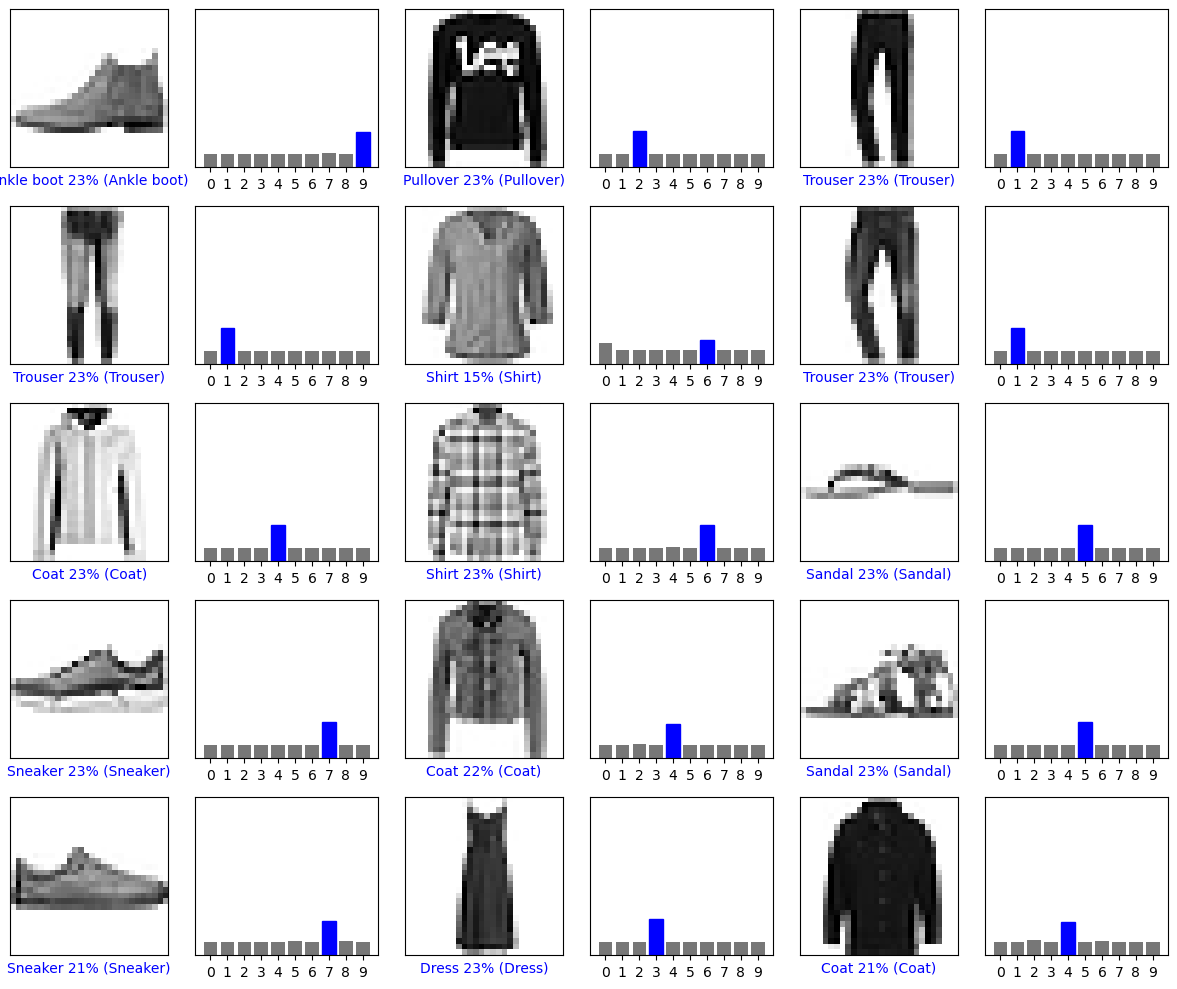

In [21]:
# predict test (many)
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i + 1)
  plot_image(i, predictions[i], y_ts, X_ts)
  plt.subplot(num_rows, 2*num_cols, 2*i + 2)
  plot_value_array(i, predictions[i], y_ts)

plt.tight_layout()
plt.show()

**5. Application**

In [22]:
# predict (one)
img = X_ts[1]

print(img.shape)

(28, 28)


In [23]:
# 배치 차원 추가
img = (np.expand_dims(img, 0))   # 배치 차원 추가    / np.expand_dims(arr, axis) : 주어진 축에 차원추가

print(img.shape)

(1, 28, 28)


In [24]:
# 예측 수행
predictions_single = probability_model.predict(img)


# 예측 결과
print('\n', predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

 [[0.08536183 0.08535354 0.23170339 0.08535354 0.08543543 0.08535354
  0.0853781  0.08535354 0.08535354 0.08535354]]


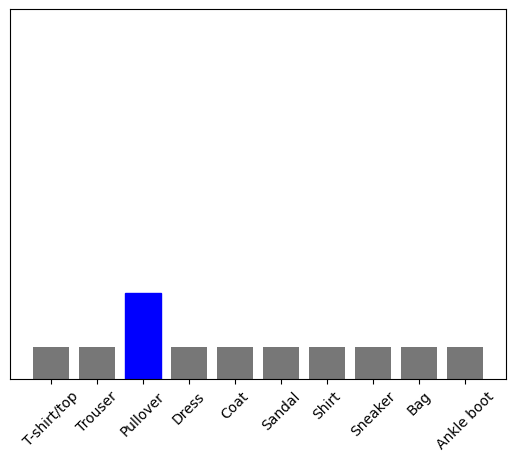

In [25]:
# 시각화
plot_value_array(1, predictions_single[0], y_ts)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [26]:
np.argmax(predictions_single[0]) # 예측 레이블

2